In [1]:
import pandas as pd

file_path = '/kaggle/input/demand/reversed_finaldatacsv.xlsx'

df = pd.read_excel(file_path)
df.head()

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal
0,01-01-2016 08:00:00,4140.0,4140,3734,113,0
1,01-01-2016 09:00:00,3941.0,3941,3551,113,0
2,01-01-2016 10:00:00,3724.0,3724,3286,133,0
3,01-01-2016 11:00:00,3603.0,3603,3168,130,0
4,01-01-2016 12:00:00,3590.0,3590,3145,140,0


In [2]:
df['Datetime_formatted'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M:%S')

In [3]:
df

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal,Datetime_formatted
0,01-01-2016 08:00:00,4140.0,4140,3734,113,0,2016-01-01 08:00:00
1,01-01-2016 09:00:00,3941.0,3941,3551,113,0,2016-01-01 09:00:00
2,01-01-2016 10:00:00,3724.0,3724,3286,133,0,2016-01-01 10:00:00
3,01-01-2016 11:00:00,3603.0,3603,3168,130,0,2016-01-01 11:00:00
4,01-01-2016 12:00:00,3590.0,3590,3145,140,0,2016-01-01 12:00:00
...,...,...,...,...,...,...,...
70464,15-01-2024 08:00:00,8619.0,8619,4331,866,2434,2024-01-15 08:00:00
70465,15-01-2024 09:00:00,9018.0,9018,4224,1202,2572,2024-01-15 09:00:00
70466,15-01-2024 10:00:00,9162.0,9162,4223,1300,2573,2024-01-15 10:00:00
70467,15-01-2024 11:00:00,9211.0,9211,4101,1427,2567,2024-01-15 11:00:00


In [4]:
daily_counts = df.groupby(df['Datetime_formatted'].dt.date).size()
daily_counts 

Datetime_formatted
2016-01-01    16
2016-01-02    24
2016-01-03    24
2016-01-04    24
2016-01-05    24
              ..
2024-01-11    24
2024-01-12    24
2024-01-13    24
2024-01-14    24
2024-01-15    13
Length: 2937, dtype: int64

In [5]:
num_days_with_24_entries = (daily_counts == 24).sum()
num_days_with_24_entries

2935

In [6]:
dates_to_keep = daily_counts[daily_counts == 24].index
df_filtered = df[df['Datetime_formatted'].dt.date.isin(dates_to_keep)]
df_filtered

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal,Datetime_formatted
16,02-01-2016 00:00:00,3737.0,3737,3269,123,0,2016-01-02 00:00:00
17,02-01-2016 01:00:00,4023.0,4023,3312,198,0,2016-01-02 01:00:00
18,02-01-2016 02:00:00,5606.0,5606,3786,1313,0,2016-01-02 02:00:00
19,02-01-2016 03:00:00,5847.0,5847,4235,1099,0,2016-01-02 03:00:00
20,02-01-2016 04:00:00,5880.0,5880,4287,1080,0,2016-01-02 04:00:00
...,...,...,...,...,...,...,...
70451,14-01-2024 19:00:00,10209.0,10209,4240,2459,2464,2024-01-14 19:00:00
70452,14-01-2024 20:00:00,10289.0,10289,4369,2391,2513,2024-01-14 20:00:00
70453,14-01-2024 21:00:00,10004.0,10004,4421,2099,2406,2024-01-14 21:00:00
70454,14-01-2024 22:00:00,9560.0,9560,4237,1864,2381,2024-01-14 22:00:00


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

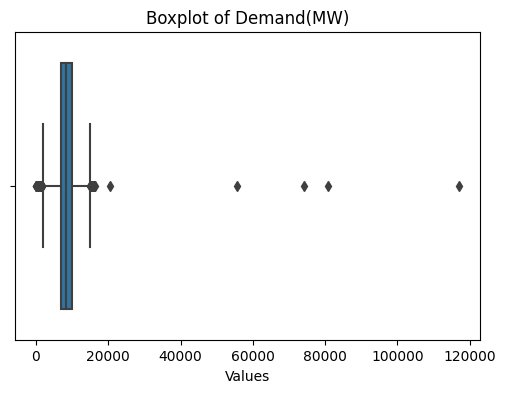

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['Demand(MW)'])
plt.title('Boxplot of Demand(MW)')
plt.xlabel('Values')

plt.show()

In [9]:
df_filtered['Demand(MW)'] = df_filtered['Demand(MW)'].clip(upper=18000)

<ipython-input-9-1d42b4394300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Demand(MW)'] = df_filtered['Demand(MW)'].clip(upper=18000)


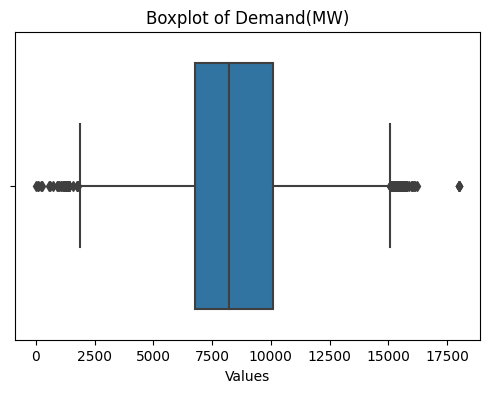

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['Demand(MW)'])
plt.title('Boxplot of Demand(MW)')
plt.xlabel('Values')

plt.show()

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [12]:
demand_data = df_filtered['Demand(MW)'].values

In [13]:
demand_data

array([ 3737,  4023,  5606, ..., 10004,  9560,  8793])

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(demand_data.reshape(-1, 1))
data_scaled

array([[0.20734689],
       [0.22324108],
       [0.31121485],
       ...,
       [0.55562965],
       [0.53095476],
       [0.48832944]])

In [15]:
train_samples = 2800 * 24
val_samples = 2 * 24
test2_samples = 2 * 24
test7_samples = 7 * 24
look_back = 24

In [16]:
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

In [17]:
train_data = data_scaled[:train_samples]  
val_data = data_scaled[train_samples:train_samples + val_samples]  
test2_data = data_scaled[train_samples + val_samples:train_samples + val_samples + test2_samples] 
test7_data = data_scaled[train_samples + val_samples + test2_samples:train_samples + val_samples + test2_samples + test7_samples]

In [18]:
X_train, y_train = create_dataset(train_data, look_back)
X_test2, y_test2 = create_dataset(test2_data, look_back)
X_test7, y_test7 = create_dataset(test7_data, look_back)
X_val, y_val = create_dataset(val_data, look_back)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1])
X_test7 = X_test7.reshape(X_test7.shape[0], X_test7.shape[1])
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1])

In [20]:
import xgboost as xgb

In [21]:
xgb_model = xgb.XGBRegressor(
    n_estimators=500,  
    learning_rate=0.01,  
    max_depth=6,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=0.1, 
    reg_alpha=0.1, 
    objective='reg:squarederror',
    random_state=42
)

In [22]:
evals_result = {}

# Train the model while tracking loss
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Track both train and val loss
    eval_metric='rmse',  # Root Mean Squared Error (RMSE) as the metric
    early_stopping_rounds=10,
    verbose=True
)

[0]	validation_0-rmse:0.12704	validation_1-rmse:0.28003
[1]	validation_0-rmse:0.12583	validation_1-rmse:0.27735
[2]	validation_0-rmse:0.12467	validation_1-rmse:0.27478
[3]	validation_0-rmse:0.12352	validation_1-rmse:0.27220
[4]	validation_0-rmse:0.12235	validation_1-rmse:0.26956
[5]	validation_0-rmse:0.12119	validation_1-rmse:0.26698
[6]	validation_0-rmse:0.12004	validation_1-rmse:0.26438
[7]	validation_0-rmse:0.11890	validation_1-rmse:0.26182
[8]	validation_0-rmse:0.11777	validation_1-rmse:0.25930
[9]	validation_0-rmse:0.11666	validation_1-rmse:0.25679
[10]	validation_0-rmse:0.11555	validation_1-rmse:0.25433
[11]	validation_0-rmse:0.11446	validation_1-rmse:0.25188
[12]	validation_0-rmse:0.11339	validation_1-rmse:0.24945
[13]	validation_0-rmse:0.11232	validation_1-rmse:0.24704
[14]	validation_0-rmse:0.11130	validation_1-rmse:0.24476
[15]	validation_0-rmse:0.11025	validation_1-rmse:0.24242


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.10922	validation_1-rmse:0.24008
[17]	validation_0-rmse:0.10823	validation_1-rmse:0.23786
[18]	validation_0-rmse:0.10721	validation_1-rmse:0.23556
[19]	validation_0-rmse:0.10621	validation_1-rmse:0.23329
[20]	validation_0-rmse:0.10521	validation_1-rmse:0.23107
[21]	validation_0-rmse:0.10423	validation_1-rmse:0.22883
[22]	validation_0-rmse:0.10326	validation_1-rmse:0.22665
[23]	validation_0-rmse:0.10229	validation_1-rmse:0.22446
[24]	validation_0-rmse:0.10134	validation_1-rmse:0.22234
[25]	validation_0-rmse:0.10040	validation_1-rmse:0.22021
[26]	validation_0-rmse:0.09950	validation_1-rmse:0.21817
[27]	validation_0-rmse:0.09858	validation_1-rmse:0.21606
[28]	validation_0-rmse:0.09770	validation_1-rmse:0.21408
[29]	validation_0-rmse:0.09679	validation_1-rmse:0.21205
[30]	validation_0-rmse:0.09590	validation_1-rmse:0.21002
[31]	validation_0-rmse:0.09501	validation_1-rmse:0.20805
[32]	validation_0-rmse:0.09417	validation_1-rmse:0.20616
[33]	validation_0-rmse:0.09330	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
results = xgb_model.evals_result()

In [24]:
train_loss = results['validation_0']['rmse']
val_loss = results['validation_1']['rmse']

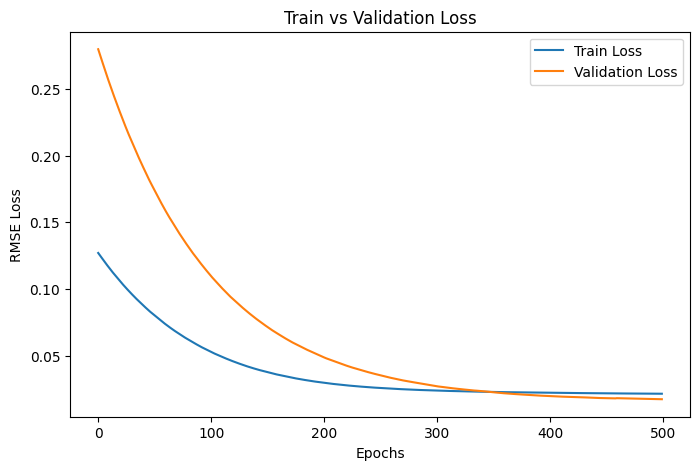

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("RMSE Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

## 2 Days Prediction

In [26]:
y_pred2 = xgb_model.predict(X_test2)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
mse = mean_squared_error(y_test2, y_pred2) 
mape = mean_absolute_percentage_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

In [29]:
print(f" RMSE:{rmse},\n MSE:{mse},\n MAPE:{mape*100}%,\n R-Squared:{r2}")

 RMSE:0.013373671524399718,
 MSE:0.00017885509004253987,
 MAPE:1.307842609102578%,
 R-Squared:0.8716617152169776


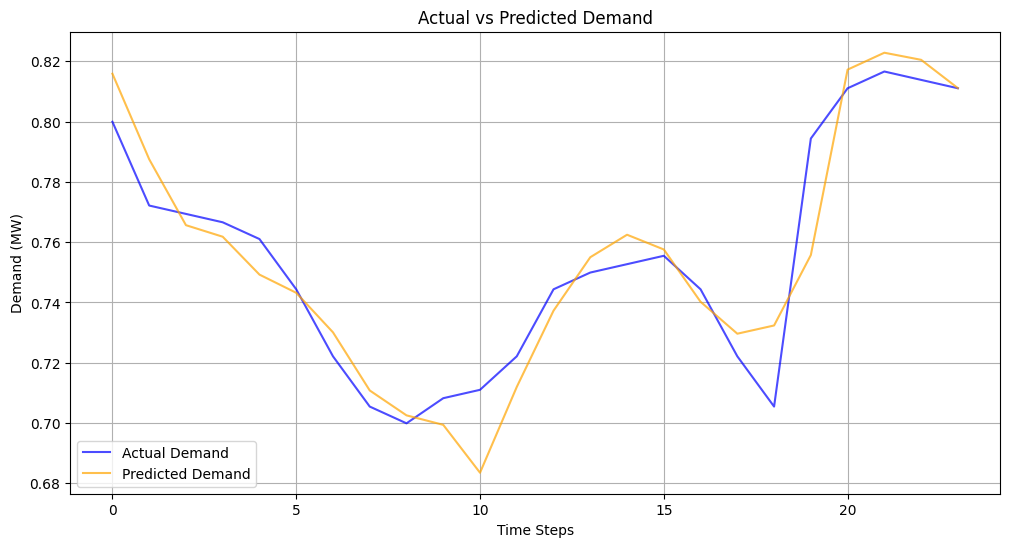

In [30]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(y_test2.flatten(), label='Actual Demand', color='blue', alpha=0.7)
plt.plot(y_pred2.flatten(), label='Predicted Demand', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()

## 7 days prediction

In [31]:
y_pred7 = xgb_model.predict(X_test7)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test7, y_pred7))
mse = mean_squared_error(y_test7, y_pred7) 
mape = mean_absolute_percentage_error(y_test7, y_pred7)
r2 = r2_score(y_test7, y_pred7)

In [33]:
print(f" RMSE:{rmse},\n MSE:{mse},\n MAPE:{mape*100}%,\n R-Squared:{r2}")

 RMSE:0.02369784388072695,
 MSE:0.0005615878045953077,
 MAPE:2.24489838850678%,
 R-Squared:0.8843297591692302


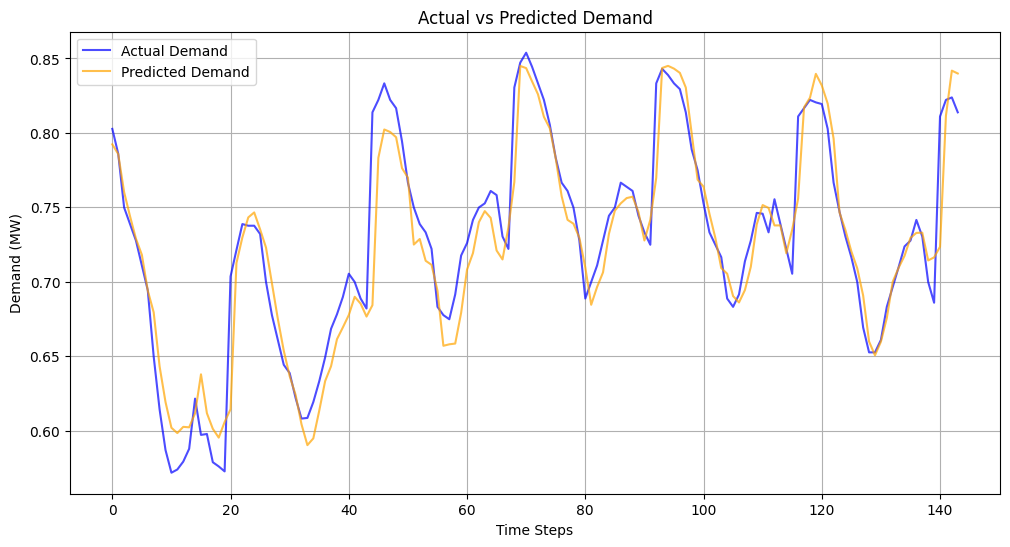

In [34]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(y_test7.flatten(), label='Actual Demand', color='blue', alpha=0.7)
plt.plot(y_pred7.flatten(), label='Predicted Demand', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()